In [2]:
# This notebook is just for Exploratory Data Analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import timedelta
from IPython.display import display
pd.options.display.max_columns = None
from sklearn.manifold import TSNE 
from matplotlib import cm

In [3]:
# After reading the file I saw that some columns are categorical and there are also columns with dates. 
# So I adjusted the pd.read_csv() command as follows.
df = pd.read_csv('dumpster_project.csv',
                 parse_dates=['order_date', 'date_entered', 'date_modified', 'customer_delivery_date'],
                dtype={'price_price_deals':'category', 'customer_waste':'category', 'status':'category'})

# 13: customer_zip
# 19: hauler_id

S:\01_VOLKi\Anoconda3\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (13,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,price_price_deals,customer_tons_include_price,price_days_included,price_yards,order_date,date_entered,customer_waste,customer_days_include,customer_cost_per_ton,date_modified,customer_cost_per_day,customer_city,status,customer_zip,customer_sub_total,customer_delivery_date,customer_container_size,price_haul,customer_state,hauler_id,price_tons_included,id
0,FF,NaN,7.0,20.0,2017-07-19,2017-07-19 11:01:12,Roofing,7.0,75.0,2017-08-18 12:51:22,15.0,Clarksville,Completed,37042,495.0,2017-07-24 00:00:00,20,NaN,TN,ce8f559c-c9be-49aa-ba75-596f74d57d70,NaN,1002c37b-b839-726e-d23b-596f748ba9d0
1,HT,4.0,3.0,20.0,2017-06-13,2017-06-13 14:18:08,Household,3.0,70.0,2017-06-21 10:30:49,75.0,Chicago,Completed,60617,450.0,2017-06-14 00:00:00,20,175.00,IL,2f1cb178-2be3-a3f5-77c0-57f80f581de8,NaN,1005a2b0-f9e7-f123-081c-59402cc5462d
2,HWT,2.0,14.0,20.0,2017-01-03,2017-01-10 16:33:38,CandD,14.0,70.0,2017-03-01 14:39:36,20.0,Boulder,Completed,48336,475.0,2017-01-11 00:00:00,20,360.00,CO,d6d3b3c8-86af-c61d-e9fa-586bd48a2078,50.0,100652b5-9132-2e4b-f0a6-587553ac4792
3,HWT,3.0,2.0,30.0,2018-11-08,2018-11-08 15:54:34,CandD,2.0,80.0,2018-11-08 16:56:31,NaN,Panama City Beach,Dispatched,32405,650.0,2018-11-09 00:00:00,30,560.00,FL,6f1beefb-23b0-2986-84aa-593703912995,3.0,1009b66d-3f6e-d997-addc-5be4a2886bda
4,HWT,1.0,20.0,30.0,2017-02-22,2017-02-22 08:25:28,Roofing,7.0,75.0,2017-02-24 14:51:26,15.0,Athens,Cancelled,75752,685.0,2017-02-24 12:00:00,30,595.38,TX,d4958c9c-ae40-e519-3c98-577c13e75a23,1.0,1009d169-a4d9-b9f1-2558-58ad91790d48


In [7]:
df.shape

(35514, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35514 entries, 0 to 35513
Data columns (total 22 columns):
price_price_deals              35485 non-null category
customer_tons_include_price    35345 non-null float64
price_days_included            29051 non-null float64
price_yards                    35499 non-null float64
order_date                     27478 non-null datetime64[ns]
date_entered                   35514 non-null datetime64[ns]
customer_waste                 35514 non-null category
customer_days_include          35480 non-null float64
customer_cost_per_ton          35376 non-null float64
date_modified                  35514 non-null datetime64[ns]
customer_cost_per_day          35413 non-null float64
customer_city                  35513 non-null object
status                         35514 non-null category
customer_zip                   35513 non-null object
customer_sub_total             35497 non-null float64
customer_delivery_date         35483 non-null datetime64[ns

In [5]:
# checking the null values and counting them.
df.isna().sum()

price_price_deals                29
customer_tons_include_price     169
price_days_included            6463
price_yards                      15
order_date                     8036
date_entered                      0
customer_waste                    0
customer_days_include            34
customer_cost_per_ton           138
date_modified                     0
customer_cost_per_day           101
customer_city                     1
status                            0
customer_zip                      1
customer_sub_total               17
customer_delivery_date           31
customer_container_size           0
price_haul                     4608
customer_state                    2
hauler_id                      8101
price_tons_included            4824
id                                0
dtype: int64

In [6]:
# Percentage of the NaN values
df.isna().sum() / len(df) * 100

price_price_deals               0.081658
customer_tons_include_price     0.475869
price_days_included            18.198457
price_yards                     0.042237
order_date                     22.627696
date_entered                    0.000000
customer_waste                  0.000000
customer_days_include           0.095737
customer_cost_per_ton           0.388579
date_modified                   0.000000
customer_cost_per_day           0.284395
customer_city                   0.002816
status                          0.000000
customer_zip                    0.002816
customer_sub_total              0.047868
customer_delivery_date          0.087290
customer_container_size         0.000000
price_haul                     12.975165
customer_state                  0.005632
hauler_id                      22.810723
price_tons_included            13.583376
id                              0.000000
dtype: float64

In [8]:
# Creating the correlation matrix and checking the correlations befor cleaning the data. 
# We will do this again after cleanig the data
corr = df.corr()

In [9]:
# Generating a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

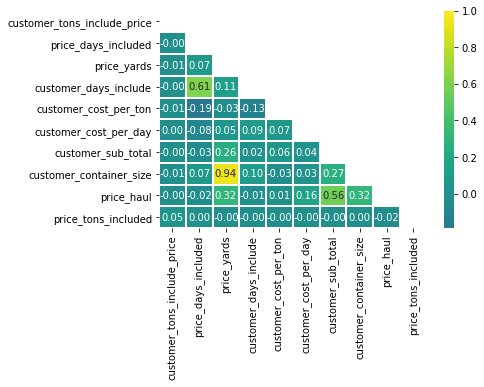

In [10]:
# Adding the mask to the heatmap and see the corr matrix as a heatmap
sns.heatmap(corr, mask=mask, cmap=cm.viridis, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()
# we can see the correlation between "price_yards" and "customer_container_size" is very high.
# according to some approach, if corr is very high between two columns you can drop one of them.

In [11]:
df.describe()
# here the max values are strange. for example in the first column 75 percent of the values are under 3.5 
# but we see there is value of 32423320 as max value.
# we alse see the same situation in columns "customer_cost_per_day", "customer_sub_total" and "price_tons_included".
# there could be false informations in these columns.

,customer_tons_include_price,price_days_included,price_yards,customer_days_include,customer_cost_per_ton,customer_cost_per_day,customer_sub_total,customer_container_size,price_haul,price_tons_included
count,3.534500e+04,29051.000000,35499.000000,35480.000000,35376.000000,35413.000000,35497.000000,35514.000000,30906.000000,30690.000000
mean,9.204096e+02,12.380652,21.751627,10.164337,85.146299,19.371322,518.769143,21.927099,301.349616,38.714891
std,1.724620e+05,8.582383,9.089044,6.957564,26.615295,18.844798,271.778715,9.016635,137.630572,42.269230
min,2.500000e-01,0.160000,0.000000,0.166000,0.050000,1.000000,1.000000,2.000000,1.000000,0.080000
25%,2.000000e+00,7.000000,15.000000,7.000000,65.000000,15.000000,425.000000,15.000000,195.000000,3.000000
50%,2.500000e+00,10.000000,20.000000,7.000000,80.000000,15.000000,495.000000,20.000000,265.000000,32.250000
75%,3.500000e+00,14.000000,30.000000,14.000000,100.000000,20.000000,595.000000,30.000000,385.225000,75.000000
max,3.242332e+07,365.000000,40.000000,360.000000,802.000000,2342.000000,45214.000000,40.000000,1851.000000,3000.000000


In [12]:
df.describe(exclude='number')

# here we can see the categorical columns.
# "price_price_deals", "customer_waste" and "status" columns have small unique values
# "customer_city", "customer_zip" and "customer_state" could also be categorical
# but this should be checked if it is worthy or not?

# and we can see the columsn with dates seems to have problems.

,price_price_deals,order_date,date_entered,customer_waste,date_modified,customer_city,status,customer_zip,customer_delivery_date,customer_state,hauler_id,id
count,35485,27478,35514,35514,35514,35513,35514,35513,35483,35512,27413,35514
unique,3,678,27821,9,29005,7031,7,12061,11723,198,4529,35514
top,HT,2018-08-27 00:00:00,2016-04-11 11:30:30,CandD,2016-05-12 11:38:13,Brooklyn,Completed,07008,2018-11-09 00:00:00,CA,846f65c7-ff32-e49a-1973-57d81c9708c2,142844ab-92c0-2065-83de-57ceff161506
freq,16133,123,51,23167,2242,485,27067,124,67,4548,478,1
first,NaN,2016-05-12 00:00:00,2015-03-10 11:30:30,NaN,2016-05-12 11:11:35,NaN,NaN,NaN,2015-03-10 05:40:00,NaN,NaN,NaN
last,NaN,2018-11-12 00:00:00,2018-11-12 12:08:11,NaN,2018-11-12 12:09:02,NaN,NaN,NaN,2018-11-26 00:00:00,NaN,NaN,NaN


In [13]:
# so I created a df only consist of date columns.
dates = df[['order_date', 'date_entered', 'date_modified', 'customer_delivery_date']]
dates.head()

,order_date,date_entered,date_modified,customer_delivery_date
0,2017-07-19,2017-07-19 11:01:12,2017-08-18 12:51:22,2017-07-24 00:00:00
1,2017-06-13,2017-06-13 14:18:08,2017-06-21 10:30:49,2017-06-14 00:00:00
2,2017-01-03,2017-01-10 16:33:38,2017-03-01 14:39:36,2017-01-11 00:00:00
3,2018-11-08,2018-11-08 15:54:34,2018-11-08 16:56:31,2018-11-09 00:00:00
4,2017-02-22,2017-02-22 08:25:28,2017-02-24 14:51:26,2017-02-24 12:00:00


In [15]:
# checking the null values and counting them.
dates.isna().sum()

order_date                8036
date_entered                 0
date_modified                0
customer_delivery_date      31
dtype: int64

In [16]:
dates.describe(exclude='number')
# order_date and "dat_modified" columns start in may 2016 but the other two date columns start one year before. In Mar 2015

,order_date,date_entered,date_modified,customer_delivery_date
count,27478,35514,35514,35483
unique,678,27821,29005,11723
top,2018-08-27 00:00:00,2016-04-11 11:30:30,2016-05-12 11:38:13,2018-11-09 00:00:00
freq,123,51,2242,67
first,2016-05-12 00:00:00,2015-03-10 11:30:30,2016-05-12 11:11:35,2015-03-10 05:40:00
last,2018-11-12 00:00:00,2018-11-12 12:08:11,2018-11-12 12:09:02,2018-11-26 00:00:00


In [17]:
# order date has 8000 missing values. so we assume that "date_entered" column as the order day.
# I want to see the delivery time. what is the difference between date entered and the "customer_delivery_date"
dates['delivery_time'] = dates['customer_delivery_date'] - dates['date_entered']
dates.head()

S:\01_VOLKi\Anoconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_date,date_entered,date_modified,customer_delivery_date,delivery_time
0,2017-07-19,2017-07-19 11:01:12,2017-08-18 12:51:22,2017-07-24 00:00:00,4 days 12:58:48
1,2017-06-13,2017-06-13 14:18:08,2017-06-21 10:30:49,2017-06-14 00:00:00,0 days 09:41:52
2,2017-01-03,2017-01-10 16:33:38,2017-03-01 14:39:36,2017-01-11 00:00:00,0 days 07:26:22
3,2018-11-08,2018-11-08 15:54:34,2018-11-08 16:56:31,2018-11-09 00:00:00,0 days 08:05:26
4,2017-02-22,2017-02-22 08:25:28,2017-02-24 14:51:26,2017-02-24 12:00:00,2 days 03:34:32


In [20]:
dates.delivery_time.value_counts(dropna=False).sort_index()
# we can see that there some deliveries before orders!!

-322 days +13:00:55     1
-185 days +08:05:43     1
-172 days +13:12:59     1
-165 days +11:20:38     1
-146 days +14:42:03     1
-135 days +08:32:21     1
-114 days +10:30:11     1
-113 days +12:59:14     1
-106 days +08:59:36     1
-95 days +14:19:09      1
-84 days +12:32:53      1
-83 days +14:23:24      1
-74 days +14:21:43      1
-72 days +15:17:37      1
-66 days +10:33:12      1
-63 days +01:47:47      1
-61 days +08:12:27      1
-61 days +08:12:31      1
-60 days +09:53:17      1
-59 days +15:15:56      1
-57 days +13:33:29      1
-53 days +07:09:00      1
-52 days +07:40:46      1
-52 days +10:32:12      1
-52 days +14:08:03      1
-52 days +14:51:14      1
-52 days +14:53:26      1
-52 days +15:10:35      1
-52 days +15:15:09      1
-51 days +08:41:25      1
                       ..
58 days 08:59:10        1
58 days 13:27:47        1
58 days 23:20:02        1
61 days 20:48:50        1
66 days 14:12:42        1
68 days 14:11:33        1
71 days 06:50:29        1
71 days 13:1

In [21]:
# we saw from the results that all missing dates in delivery_date has a Status of "SWAP"
# only one result is cancelled.
dates_nT = df[pd.isnull(df.customer_delivery_date)]
print(len(dates_nT))
dates_nT
# so we can think about dropping these 31 rows.

31


,price_price_deals,customer_tons_include_price,price_days_included,price_yards,order_date,date_entered,customer_waste,customer_days_include,customer_cost_per_ton,date_modified,customer_cost_per_day,customer_city,status,customer_zip,customer_sub_total,customer_delivery_date,customer_container_size,price_haul,customer_state,hauler_id,price_tons_included,id
1191,HWT,3.0,14.0,20.0,2017-01-27,2017-09-07 14:00:59,CandD,14.0,85.00,2017-09-07 14:00:59,30.00,Pittsburgh,Swap,15238,545.0,NaT,20,439.00,PA,95664780-f8ad-057f-45a3-5751ba6b6916,4.00,19fe1c32-eecb-f4ac-532d-59b189d66feb
1366,HT,3.0,7.0,30.0,2016-08-30,2016-09-09 15:26:00,CandD,7.0,105.00,2016-09-09 15:31:08,20.00,Carteret,Swap,07008,670.0,NaT,30,200.00,NJ,8395ecb1-b424-c414-ba3b-5739cb8fa4eb,5.00,1b603ce8-29aa-3113-acd2-57d30c084a9d
2151,FF,1.0,30.0,10.0,2016-12-01,2017-02-22 16:55:03,Dirt,60.0,80.00,2017-02-22 16:55:03,20.00,North Hollywood,Swap,91605,580.0,NaT,10,NaN,CA,1c91c149-1ab7-249a-7697-573f3aad13d6,105.00,21ffa8ac-d132-61dd-d085-58ae083a0a50
3228,HT,4.0,30.0,30.0,2017-07-13,2017-07-13 16:36:17,CandD,7.0,55.00,2017-07-13 16:36:17,15.00,Beech Bluff,Swap,38313,525.0,NaT,30,300.00,TN,da9bf017-19ec-f2f6-3808-5877a187f0f8,4.00,2ac22666-ecb9-252b-2f07-5967d9b0f6a4
3349,HWT,3.0,10.0,40.0,2016-08-30,2016-09-01 09:32:15,Roofing,7.0,70.00,2016-09-01 09:32:15,15.00,Clearfield,Swap,16830,700.0,NaT,40,600.00,PA,bf3fa076-cc0e-247b-80ec-57601e71b637,NaN,2bd065c8-e918-13f7-8118-57c82dc3ee89
4305,HT,2.5,7.0,20.0,2016-06-21,2016-06-27 15:53:15,CandD,7.0,100.00,2016-06-27 15:53:15,25.00,Philadelphia,Swap,19130,450.0,NaT,20,200.00,PA,e522cec8-7ecd-8a89-c66a-573f0dbe76d3,4.00,33dfefc3-529f-20d2-5572-577184c8895d
4523,HT,4.0,7.0,20.0,NaT,2016-05-17 11:21:29,CandD,7.0,100.00,2016-05-17 11:21:29,25.00,Lawrence,Swap,01841,480.0,NaT,20,185.00,ma,NaN,50.00,35a11643-dade-8d5c-35ae-573b36c2473e
5031,HWT,5.0,7.0,20.0,2018-10-19,2018-11-08 15:41:16,CandD,7.0,150.00,2018-11-08 15:41:16,45.00,Rodeo,Swap,94572,595.0,NaT,20,550.00,CA,5f788c47-2707-3977-7d49-5aac017d09c7,46.00,39ffc8da-c3db-bfbf-5920-5be49f7221da
7483,HWT,3.0,30.0,30.0,2017-06-14,2017-07-12 10:45:58,CandD,14.0,65.00,2017-07-12 10:45:58,15.00,Geismar,Swap,70734,625.0,NaT,30,425.00,LA,e4b54e1a-0c8c-9a92-01f7-586be522f409,5.00,4dfebff5-3ad8-d5bb-0b8c-596636e62109
8073,HT,3.0,14.0,15.0,2016-11-21,2016-12-05 09:29:28,Concrete,7.0,100.00,2016-12-05 09:29:28,15.00,Island Park,Swap,11558,950.0,NaT,15,175.00,NY,31edd69b-9bd2-3515-afac-5807d29a81d2,43.05,52e0d29d-be13-0e83-956d-584579a204a0


In [22]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35514 entries, 0 to 35513
Data columns (total 5 columns):
order_date                27478 non-null datetime64[ns]
date_entered              35514 non-null datetime64[ns]
date_modified             35514 non-null datetime64[ns]
customer_delivery_date    35483 non-null datetime64[ns]
delivery_time             35483 non-null timedelta64[ns]
dtypes: datetime64[ns](4), timedelta64[ns](1)
memory usage: 1.4 MB


In [23]:
# what is the diff of order days and "date_entered."
dates['time_diff'] = dates['date_entered'] - dates['order_date']

S:\01_VOLKi\Anoconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
dates.max()
# there is 247 days for a delivery and 688 days between order date and date_entered

order_date                2018-11-12 00:00:00
date_entered              2018-11-12 12:08:11
date_modified             2018-11-12 12:09:02
customer_delivery_date    2018-11-26 00:00:00
delivery_time               247 days 20:29:30
time_diff                   688 days 14:49:57
dtype: object

In [25]:
dates.min()
# minimum delivery time is -322 days.

order_date                2016-05-12 00:00:00
date_entered              2015-03-10 11:30:30
date_modified             2016-05-12 11:11:35
customer_delivery_date    2015-03-10 05:40:00
delivery_time             -322 days +13:00:55
time_diff                     0 days 01:33:55
dtype: object

In [28]:
date_errors = dates[dates.delivery_time < timedelta(0)]
date_errors.describe()
# there are 7000 minus delivery times.

,delivery_time,time_diff
count,7078,3658
mean,-2 days +17:25:23.079542,15 days 18:45:47.973209
std,7 days 21:36:16.988071,38 days 14:27:12.732141
min,-322 days +13:00:55,0 days 01:57:31
25%,-1 days +11:35:25.500000,0 days 11:05:45.500000
50%,-1 days +14:44:03,1 days 10:03:55.500000
75%,-1 days +22:32:20.250000,12 days 16:13:45.500000
max,-1 days +23:59:51,688 days 14:49:57


In [30]:
dates.describe(exclude='number')
# here I am finishing investigating dates.
# I think we can select date_entered if we need dates. it covers more dates according to others.
# And it has more unique values.

,order_date,date_entered,date_modified,customer_delivery_date
count,27478,35514,35514,35483
unique,678,27821,29005,11723
top,2018-08-27 00:00:00,2016-04-11 11:30:30,2016-05-12 11:38:13,2018-11-09 00:00:00
freq,123,51,2242,67
first,2016-05-12 00:00:00,2015-03-10 11:30:30,2016-05-12 11:11:35,2015-03-10 05:40:00
last,2018-11-12 00:00:00,2018-11-12 12:08:11,2018-11-12 12:09:02,2018-11-26 00:00:00


HT     16133
HWT    14465
FF      4887
NaN       29
Name: price_price_deals, dtype: int64

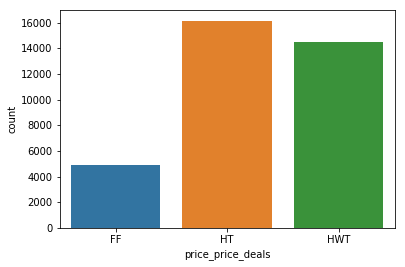

In [31]:
# From this point of the notebook I start investigating all columns one by one. 
# Investigating all columns one by one for the possible missing or false data, outliers and etc. 
sns.countplot(x=df.price_price_deals)
df.price_price_deals.value_counts(dropna=False)
# there 29 missing rows. Lets check them out.

In [33]:
price_nan = df[pd.isnull(df.price_price_deals)]
print(len(price_nan))
price_nan
# most of them cancelled and have missing data.
# lets group them by  "customer_waste" and "status"

29


,price_price_deals,customer_tons_include_price,price_days_included,price_yards,order_date,date_entered,customer_waste,customer_days_include,customer_cost_per_ton,date_modified,customer_cost_per_day,customer_city,status,customer_zip,customer_sub_total,customer_delivery_date,customer_container_size,price_haul,customer_state,hauler_id,price_tons_included,id
3388,NaN,4.0,NaN,0.0,2017-09-14,2017-09-14 15:34:30,Roofing,NaN,NaN,2017-09-15 10:58:52,NaN,ISANTI,Cancelled,55040,385.00,2017-09-15 08:00:00,10,NaN,MN,NaN,5.0,2c292d26-bf4d-3b77-1c66-59bad916eee9
5284,NaN,3.0,NaN,0.0,2017-04-04,2017-04-04 16:19:31,Concrete,NaN,NaN,2017-04-04 16:31:43,NaN,Hobbs,Closed,88240,350.00,2017-04-06 00:00:00,30,NaN,NM,NaN,3.0,3c03e8f7-1ae8-5299-25f7-58e3ff838060
9890,NaN,1.0,NaN,0.0,2018-09-05,2018-09-05 13:14:45,CandD,7.0,85.0,2018-09-05 13:56:01,25.0,Fountain Valley,Closed,92708,795.00,2018-09-14 14:00:00,40,NaN,CA,NaN,140.0,6232ade1-c1a8-1ccf-0e02-5b900fa09020
13054,NaN,1.0,NaN,0.0,2016-05-31,2016-05-31 13:51:01,Roofing,7.0,75.0,2016-05-31 14:54:40,15.0,Buckingham,Completed,23921,525.00,2016-05-24 00:00:00,20,NaN,VA,NaN,50.0,7c6ef140-7dd3-46fb-f8bc-574dcf71cb51
14422,NaN,2.0,NaN,0.0,2017-03-10,2017-03-10 14:25:03,CandD,NaN,NaN,2017-03-10 14:26:18,NaN,Eufaula,Cancelled,74432,449.00,2017-03-24 00:00:00,20,NaN,OK,NaN,2.0,87d8232d-47b8-3c72-2e3f-58c2fde3bccf
16411,NaN,1.0,NaN,0.0,2016-08-17,2016-08-17 13:18:43,CandD,23.0,75.0,2016-08-17 13:24:04,423.0,oceanside,Completed,11572,2.00,2016-08-24 00:00:00,10,NaN,ny,373932c8-44b9-d2a2-e3cc-57b49c177823,90.0,981597f0-c685-f12c-3730-57b49cb6eb70
17343,NaN,4.0,NaN,0.0,2018-02-08,2018-02-08 15:45:07,CandD,14.0,75.0,2018-02-08 15:48:34,20.0,West Palm Beach,Cancelled,33407,400.00,2018-02-09 08:00:00,10,NaN,FL,NaN,10.0,9f7e763f-a087-6b1e-131c-5a7cb6278bf2
22019,NaN,2.0,NaN,0.0,2016-08-29,2016-08-29 11:13:51,CandD,NaN,NaN,2016-08-29 14:54:20,NaN,Grayling,Cancelled,49728,580.00,2016-08-30 00:00:00,20,NaN,MI,NaN,35.0,c71118d9-e3e4-6dab-3d96-57c451a1c969
23031,NaN,1.0,NaN,0.0,2016-06-02,2016-06-02 11:47:44,CandD,5.0,110.0,2016-06-06 14:14:36,15.0,Brooklyn,Completed,11209,425.00,2016-06-06 00:00:00,10,NaN,NY,33455c30-6bcd-996d-ede9-5734d3d8a417,1.0,cfa8f0c1-b55c-6430-d020-575055b84cb1
23082,NaN,1.5,NaN,0.0,2018-06-29,2018-06-29 14:49:53,CandD,14.0,75.0,2018-07-02 15:15:28,12.5,Homerville,Cancelled,31634,575.00,2018-07-03 12:00:00,40,NaN,GA,NaN,49.0,d021a363-e4de-2277-a469-5b367ff59288


In [51]:
status = price_nan.groupby(['customer_waste', 'status'])
status.price_price_deals.agg(['size'])
# most of them cancelled.

size
customer_waste status         
CandD          Cancelled    14
               Closed        1
               Completed     4
Concrete       Cancelled     1
               Closed        1
Household      Cancelled     3
Roofing        Cancelled     3
               Completed     1
Yard_Waste     Cancelled     1

In [52]:
# making a mostly numeric df but with the categorical column of price_price_deals to see the pairplot
df_numeric = df[['price_price_deals','customer_tons_include_price','price_days_included','price_yards',
                 'customer_days_include','customer_cost_per_ton','customer_cost_per_day','customer_sub_total',
                 'customer_container_size','price_haul','price_tons_included']]
df_numeric.head()

,price_price_deals,customer_tons_include_price,price_days_included,price_yards,customer_days_include,customer_cost_per_ton,customer_cost_per_day,customer_sub_total,customer_container_size,price_haul,price_tons_included
0,FF,NaN,7.0,20.0,7.0,75.0,15.0,495.0,20,NaN,NaN
1,HT,4.0,3.0,20.0,3.0,70.0,75.0,450.0,20,175.00,NaN
2,HWT,2.0,14.0,20.0,14.0,70.0,20.0,475.0,20,360.00,50.0
3,HWT,3.0,2.0,30.0,2.0,80.0,NaN,650.0,30,560.00,3.0
4,HWT,1.0,20.0,30.0,7.0,75.0,15.0,685.0,30,595.38,1.0


S:\01_VOLKi\Anoconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
S:\01_VOLKi\Anoconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


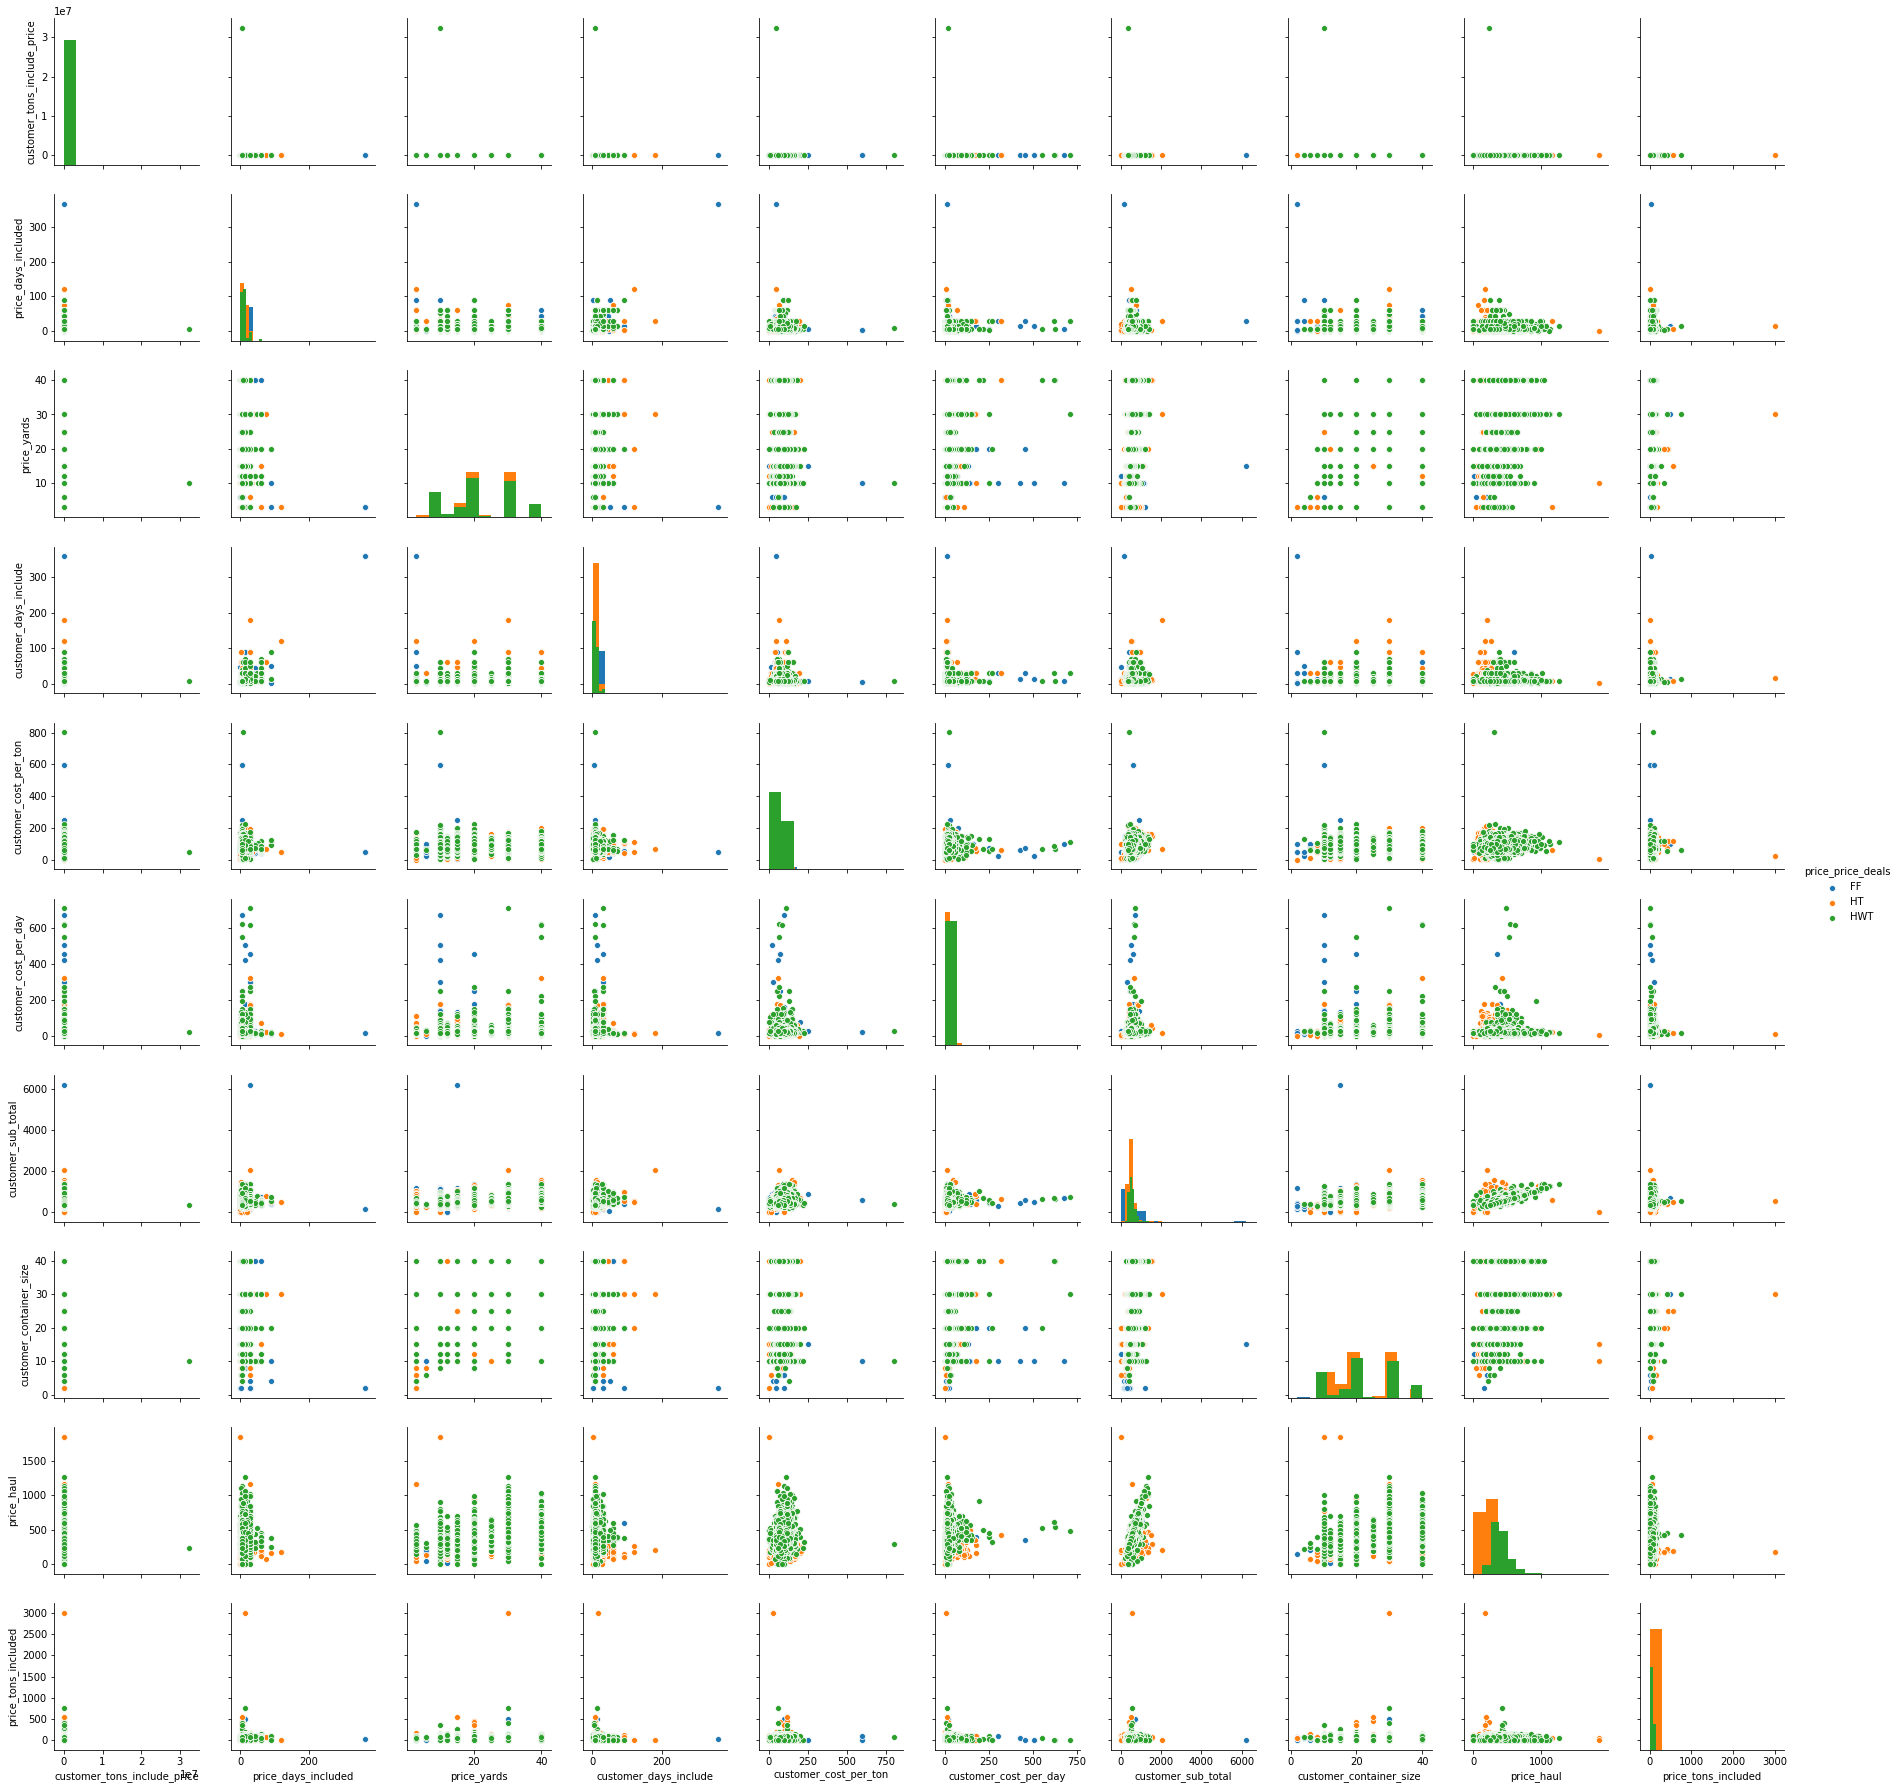

In [53]:
# now I will use pairplot to see the relationship between all columns.
fig_numeric = sns.pairplot(df_numeric, hue='price_price_deals', diag_kind='hist')
plt.savefig('fig_numeric.png', dpi=300, bbox_inches='tight')
plt.show()

 3.242332e+07       1
 7.500000e+02       1
 6.000000e+02       2
 5.000000e+02       1
 4.340000e+02       1
 8.400000e+01       1
 3.600000e+01       1
 3.000000e+01       3
 2.100000e+01       1
 2.000000e+01      17
 1.800000e+01       1
 1.600000e+01       1
 1.500000e+01      48
 1.400000e+01       2
 1.300000e+01       3
 1.200000e+01      49
 1.100000e+01       1
 1.000000e+01    1821
 9.000000e+00      26
 8.500000e+00       3
 8.000000e+00     184
 7.500000e+00       3
 7.000000e+00     182
 6.500000e+00       9
 6.000000e+00     424
 5.500000e+00      21
 5.300000e+00       1
 5.000000e+00    1436
 4.800000e+00       1
 4.500000e+00      49
 4.200000e+00       3
 4.000000e+00    4443
 3.700000e+00       1
 3.500000e+00     111
 3.250000e+00       2
 3.000000e+00    8715
 2.800000e+00       1
 2.750000e+00       1
 2.700000e+00       1
 2.500000e+00     326
 2.300000e+00       2
 2.250000e+00       1
 2.173913e+00       1
 2.000000e+00    9386
 1.900000e+00       1
 1.800000e

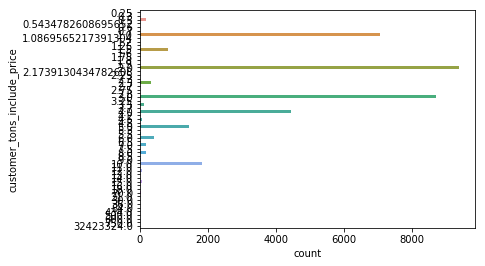

In [54]:
sns.countplot(y=df.customer_tons_include_price)
df.customer_tons_include_price.value_counts(dropna=False).sort_index(ascending=False)
#  32423320 Dollar is seems to be a false value. 

In [55]:
high_price = df[df.customer_tons_include_price > 1000]
high_price
# when we check the customer sub total column we see that the right value could be max 325.

,price_price_deals,customer_tons_include_price,price_days_included,price_yards,order_date,date_entered,customer_waste,customer_days_include,customer_cost_per_ton,date_modified,customer_cost_per_day,customer_city,status,customer_zip,customer_sub_total,customer_delivery_date,customer_container_size,price_haul,customer_state,hauler_id,price_tons_included,id
29998,HWT,32423324.0,7.0,10.0,NaT,2015-04-02 11:30:30,Household,7.0,50.0,2016-05-12 11:38:13,20.0,Monetta,Completed,29105,325.0,2015-04-02 17:40:05,10,235.0,SC,NaN,NaN,ooooo-aeauoeu-thdtho-316


In [56]:
df.price_days_included.value_counts(dropna=False).sort_index()

 0.16          1
 1.00         42
 1.84          1
 2.00        169
 2.01          1
 2.12          1
 2.15          1
 2.42          1
 2.50         11
 2.83          1
 2.92          1
 3.00        342
 3.24          2
 3.42          1
 4.00        137
 4.65          1
 5.00        759
 5.06          1
 5.54          1
 6.00        159
 6.55          1
 7.00      11343
 8.00         84
 9.00         33
 10.00      2861
 10.62         1
 11.00        32
 11.37         1
 11.58         1
 11.98         5
 12.00        44
 14.00      8789
 15.00       425
 16.00         8
 17.00        13
 18.00         8
 19.21         1
 20.00        79
 21.00       656
 22.00         1
 23.00         1
 24.00         2
 25.00        19
 28.00        43
 30.00      2754
 31.00         5
 35.00         1
 40.00         3
 45.00         7
 50.00         1
 52.00         1
 55.00         1
 60.00       185
 75.00         1
 90.00         5
 120.00        1
 365.00        2
NaN         6463
Name: price_da

 20.0    11043
 30.0    10319
 10.0     7170
 15.0     3106
 40.0     2714
 12.0      558
 25.0      292
 3.0       271
NaN         15
 0.0        14
 6.0        12
Name: price_yards, dtype: int64

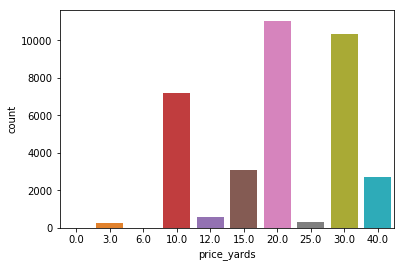

In [57]:
sns.countplot(x=df.price_yards)
df.price_yards.value_counts(dropna=False)

CandD         23167
Household      8275
Roofing        1547
Concrete       1161
Dirt            475
Yard_Waste      469
Mixed           218
Metal           198
Hazardous         4
Name: customer_waste, dtype: int64

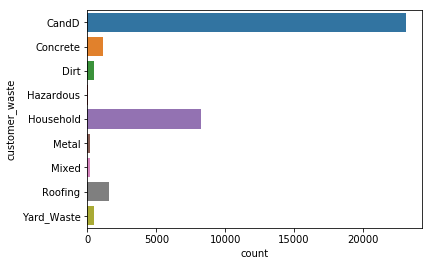

In [58]:
# mostly CandD and Household waste.
sns.countplot(y=df.customer_waste)
df.customer_waste.value_counts(dropna=False)

 7.000      18756
 14.000      7673
 10.000      3619
 30.000      1428
 5.000       1278
 21.000       502
 3.000        433
 12.000       260
 15.000       220
 8.000        203
 4.000        189
 2.000        170
 6.000        150
 20.000       143
 1.000         79
 11.000        53
 60.000        44
 9.000         42
NaN            34
 25.000        33
 17.000        29
 28.000        26
 18.000        23
 13.000        17
 16.000        14
 45.000        14
 22.000        13
 90.000        10
 19.000         6
 31.000         5
 23.000         5
 26.000         5
 35.000         3
 70.000         3
 37.000         3
 24.000         3
 29.000         3
 27.000         3
 44.000         2
 38.000         2
 120.000        2
 50.000         2
 360.000        2
 324.000        1
 180.000        1
 234.000        1
 0.166          1
 34.000         1
 40.000         1
 47.000         1
 10.500         1
 33.000         1
 48.000         1
Name: customer_days_include, dtype: int64

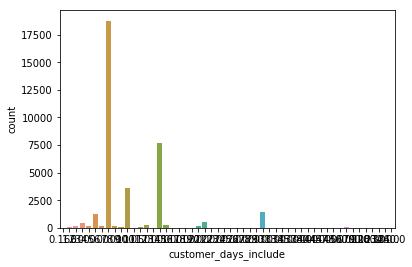

In [60]:
sns.countplot(x=df.customer_days_include)
df.customer_days_include.value_counts(dropna=False)

# This column type can be converted to int64
# we clearly see that most common day is 7 days(18756), than 14 days(7673), 10 days in third place. And then monthly.

In [72]:
print(df.customer_cost_per_ton.value_counts(dropna=False))
df.customer_cost_per_ton.describe()

 75.00     3855
 100.00    2998
 65.00     2961
 110.00    2237
 70.00     2091
 85.00     1844
 95.00     1614
 80.00     1408
 50.00     1375
 60.00     1374
 120.00    1312
 55.00     1142
 105.00    1091
 125.00    1064
 90.00      649
 115.00     530
 40.00      340
 145.00     312
 45.00      289
 135.00     239
 118.00     238
 140.00     237
 150.00     229
 130.00     189
 68.00      168
 82.00      148
NaN         138
 72.00      130
 62.00      129
 67.00      129
           ... 
 67.64        1
 79.28        1
 77.42        1
 141.27       1
 154.36       1
 58.65        1
 100.75       1
 63.33        1
 136.55       1
 63.52        1
 113.48       1
 62.19        1
 55.81        1
 162.77       1
 106.74       1
 190.00       1
 74.82        1
 167.67       1
 70.87        1
 11.00        1
 81.22        1
 66.75        1
 100.56       1
 57.96        1
 151.33       1
 38.25        1
 132.22       1
 106.76       1
 68.83        1
 86.94        1
Name: customer_cost_per_

count    35376.000000
mean        85.146299
std         26.615295
min          0.050000
25%         65.000000
50%         80.000000
75%        100.000000
max        802.000000
Name: customer_cost_per_ton, dtype: float64

In [74]:
df.customer_cost_per_day.value_counts(dropna=False)

 15.00     15595
 20.00      6099
 25.00      3567
 10.00      2194
 35.00      1118
 12.00       863
 13.00       683
 30.00       629
 18.00       432
 14.00       380
 20.25       353
 17.00       331
 50.00       219
 16.00       213
 40.00       180
 45.00       169
 80.00       116
 15.25       115
 20.50       108
NaN          101
 12.50        99
 22.00        98
 70.00        95
 5.00         90
 20.01        87
 75.00        69
 60.00        66
 19.00        59
 11.00        49
 65.00        46
           ...  
 13.75         1
 47.22         1
 15.58         1
 14.51         1
 33.94         1
 617.00        1
 24.25         1
 19.33         1
 82.21         1
 15.95         1
 551.31        1
 22.45         1
 17.87         1
 33.46         1
 27.86         1
 20.21         1
 19.88         1
 18.72         1
 16.28         1
 22.25         1
 23.88         1
 25.65         1
 18.11         1
 26.33         1
 26.35         1
 675.00        1
 300.00        1
 12.38        

In [75]:
df.customer_city.value_counts(dropna=False)

Brooklyn                     485
Chicago                      436
Bronx                        277
Fall River                   171
Jacksonville                 170
Queens                       166
Brockton                     165
Cincinnati                   126
Staten Island                125
Carteret                     116
Baldwin                      104
Springfield                  101
Lynn                          99
Philadelphia                  99
Concord                       95
Columbus                      95
Washington                    93
Kansas City                   93
Los Angeles                   91
Fresno                        89
Memphis                       89
Greenville                    88
Lawrence                      87
New York                      86
Yonkers                       82
San Jose                      82
Miami                         79
Portland                      78
Atlanta                       77
Lakeland                      76
          

Completed     27067
Cancelled      3385
Closed         2590
Dispatched     2383
Swap             76
New               7
NeedHauler        6
Name: status, dtype: int64

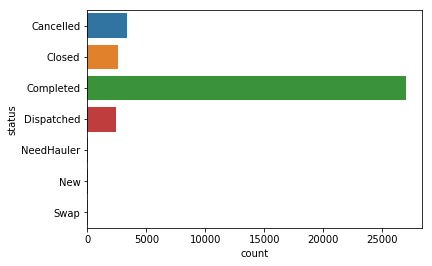

In [76]:
sns.countplot(y=df.status)
df.status.value_counts(dropna=False)
# there are 27067 "completed" ones. in my opinion we should keep only the completed ones as the data.
# I think this makes our algorithm more reliable.

In [31]:
#sns.countplot(x=df.customer_zip)
df.customer_zip.value_counts(dropna=False)

07008    124
02301    106
11510    101
11550     67
11413     55
02302     52
27260     50
02722     49
02720     48
92243     46
01902     42
10466     41
16803     39
94520     38
11580     38
02148     37
10550     37
02368     36
02724     36
11207     36
53081     36
11203     35
02721     35
42301     34
01841     34
11572     34
12550     34
92677     33
18640     33
02169     33
        ... 
15208      1
32905      1
62670      1
47523      1
30042      1
08551      1
06030      1
66018      1
36862      1
32784      1
44134      1
64138      1
06807      1
48891      1
53203      1
66043      1
47018      1
78072      1
93270      1
12452      1
59601      1
13203      1
30016      1
07069      1
45415      1
02494      1
12580      1
47842      1
35044      1
NaN        1
Name: customer_zip, Length: 12062, dtype: int64

In [77]:
#sns.countplot(x=df.customer_sub_total)
df.customer_sub_total.value_counts(dropna=False)

395.00     1887
495.00     1787
595.00     1456
450.00     1406
475.00     1364
550.00     1300
425.00     1072
375.00     1048
525.00     1041
575.00      824
650.00      767
350.00      735
385.00      726
695.00      723
485.00      695
480.00      575
465.00      539
625.00      531
585.00      500
365.00      408
435.00      401
565.00      395
445.00      385
500.00      382
545.00      340
750.00      321
460.00      318
390.00      318
675.00      315
470.00      299
           ... 
479.04        1
451.60        1
697.80        1
408.33        1
758.00        1
534.62        1
587.60        1
1026.80       1
830.80        1
450.96        1
784.00        1
451.40        1
921.00        1
522.53        1
593.37        1
577.80        1
637.60        1
664.00        1
927.00        1
219.00        1
591.27        1
415.20        1
510.80        1
514.96        1
674.00        1
346.00        1
521.66        1
877.68        1
955.00        1
519.00        1
Name: customer_sub_total

2        17
4         6
6        11
8        10
10     7361
12      480
15     2975
20    11173
25      270
30    10413
40     2798
Name: customer_container_size, dtype: int64

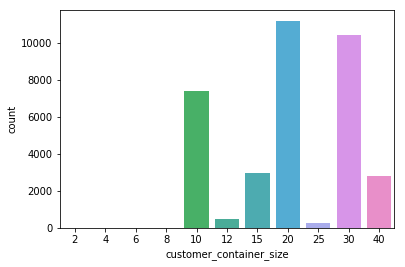

In [78]:
sns.countplot(x=df.customer_container_size)
df.customer_container_size.value_counts(dropna=False).sort_index()
# we see that customers mostly order 20 and 30 yard container size

In [79]:
df.price_haul.value_counts(dropna=False)
# NaN values too much

NaN        4608
 175.00    2795
 200.00    2443
 185.00    1463
 250.00    1277
 300.00    1105
 225.00    1087
 275.00     837
 195.00     768
 350.00     724
 325.00     714
 150.00     687
 400.00     656
 425.00     582
 450.00     580
 265.00     573
 375.00     566
 295.00     353
 550.00     315
 500.00     310
 395.00     290
 475.00     267
 370.00     218
 285.00     211
 340.00     209
 125.00     206
 525.00     205
 320.00     196
 495.00     180
 165.00     167
           ... 
 340.87       1
 514.03       1
 613.13       1
 275.50       1
 920.00       1
 514.00       1
 770.22       1
 433.44       1
 365.67       1
 125.22       1
 359.45       1
 257.57       1
 241.43       1
 143.48       1
 408.60       1
 412.26       1
 390.96       1
 246.92       1
 360.50       1
 169.47       1
 590.33       1
 379.49       1
 360.81       1
 293.80       1
 365.09       1
 374.50       1
 270.60       1
 175.54       1
 87.50        1
 325.40       1
Name: price_haul, Length

In [45]:
df.customer_state.value_counts(dropna=False).sort_index()
# customer_state column is not so tidy.

-                1
1                1
1111             1
4               10
45230            1
77358            4
86303            1
90255            2
AI               4
AK               9
AL             456
AR             426
AZ             383
Al               4
Alabama          7
Alger            1
Ar               1
Arizona          6
Arkansas         4
Ave              1
Az               3
Bronx            4
CA            4548
CO             374
CT             565
Ca              57
Califorina       2
California      19
Co               2
Ct               8
              ... 
ar               2
ca               2
califorina       1
co               1
ct               2
cv               2
delaware         1
fl               2
ga               4
il               1
ks               2
la               1
ma               5
md               1
me               1
mi               4
miami            1
nc               2
nj              13
ny              28
oh               1
ok          

In [80]:
df.hauler_id.value_counts(dropna=False)
# we use some haulers most but there are too many missing values.

NaN                                     8101
846f65c7-ff32-e49a-1973-57d81c9708c2     478
a13cb2d3-8cdc-574f-4067-591a00c63aec     454
15711061-ee80-127c-89b4-59231e2bb38e     337
33455c30-6bcd-996d-ede9-5734d3d8a417     311
2f1cb178-2be3-a3f5-77c0-57f80f581de8     290
31edd69b-9bd2-3515-afac-5807d29a81d2     247
83df249e-65de-f6db-c3fb-5735e9cd2188     223
2dae2e3a-5131-af18-d91f-57c48e099e28     223
8395ecb1-b424-c414-ba3b-5739cb8fa4eb     204
5150d7b1-fd5f-4bec-3d48-5a7384106278     198
5f788c47-2707-3977-7d49-5aac017d09c7     194
8d675a28-5703-e3d3-66bd-5b636af9fe93     187
b5175134-18ff-4e25-2167-5739e2a457f5     159
b3350dad-6aa0-c9c1-ed78-573b0807d4da     144
e9583c5e-a5cb-d3a0-2103-583c897f2332     141
dab0546f-ff4b-3ab4-17ea-5735f9ca3106     134
1c91c149-1ab7-249a-7697-573f3aad13d6     133
3c396068-5823-13a1-92ff-57360eb3e47c     133
1afb8c1b-b7e2-7be4-72f9-5a131b4680ef     131
366a2b4b-25cb-6525-afd0-5734c0c12bab     128
2d7f5346-3f3e-6c52-63e2-5a845fe99c20     126
370a3099-7

In [83]:
df.price_tons_included.value_counts(dropna=False).sort_index(ascending=False)
# 3000 tons included price?

 3000.00       1
 750.00        1
 555.10        1
 500.00        1
 450.00        1
 425.00        1
 410.00        1
 350.00        2
 274.80        1
 225.00        1
 200.00        4
 175.00        4
 153.48        7
 153.00        1
 150.00        7
 149.69        1
 148.00        1
 147.34        1
 145.84        3
 145.00        3
 144.97        2
 140.00      130
 138.41        3
 137.83        3
 137.67        1
 135.00       23
 131.76        4
 130.00       19
 129.11        1
 128.74        1
            ... 
 7.00        309
 6.75          4
 6.50          9
 6.00        809
 5.50          4
 5.00       1703
 4.80          1
 4.50         48
 4.00       2965
 3.50         93
 3.30          1
 3.11          1
 3.00       3218
 2.80          1
 2.75          2
 2.50        178
 2.30          1
 2.25          2
 2.00       2761
 1.75          2
 1.50        225
 1.48          1
 1.25         10
 1.20          1
 1.00       1293
 0.80          4
 0.50         18
 0.25         

In [84]:
df.id.value_counts(dropna=False)
# we already know that all id's are unique.

142844ab-92c0-2065-83de-57ceff161506    1
5690a89c-405a-d238-c3f0-5bb390c57e0e    1
ooooo-aeauoeu-thdtho-2747               1
ed18d0ed-2abc-8070-890f-5a8dd5506241    1
2d825ebe-a64b-b9e1-6585-5af5fd30083e    1
f2a6394a-f3d6-cc06-c516-5a9f11d8edd8    1
ooooo-aeauoeu-thdtho-10287              1
efb2e1c4-e22a-bc0e-04d2-5b103cc4ca0b    1
7af03222-e428-d7f8-bca3-5b92a1e3a6ee    1
ooooo-aeauoeu-thdtho-7648               1
ooooo-aeauoeu-thdtho-3317               1
ooooo-aeauoeu-thdtho-7386               1
ooooo-aeauoeu-thdtho-1690               1
d0c6b3f8-9b0b-94fc-cc4b-5b31107330e0    1
565e9e06-23f2-3449-3079-59c2c11a6d85    1
4e7db66e-ba5e-854b-be44-58efdec9021b    1
787709c7-8f0a-1c97-05c0-5b97f9179c80    1
16ba3174-b5f7-adb0-0fcc-5be08fc1b457    1
def11781-6365-37dc-2536-5b45fcdfe7df    1
723bb7ec-261e-3660-b77c-5b7d919e7871    1
42e8d9c8-ef10-ddc6-65a1-5b3521e6d487    1
ooooo-aeauoeu-thdtho-5861               1
4579bb17-1abc-39e2-c2d4-5af08585880b    1
ooooo-aeauoeu-thdtho-6341         

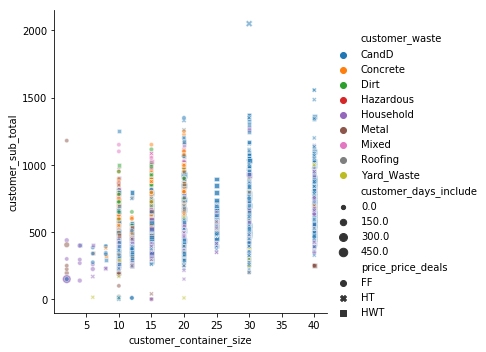

In [86]:
# trying a relative plot.
sns.relplot(x='customer_container_size', y='customer_sub_total', 
            data=df, size='customer_days_include', hue='customer_waste', alpha=0.5, style='price_price_deals')

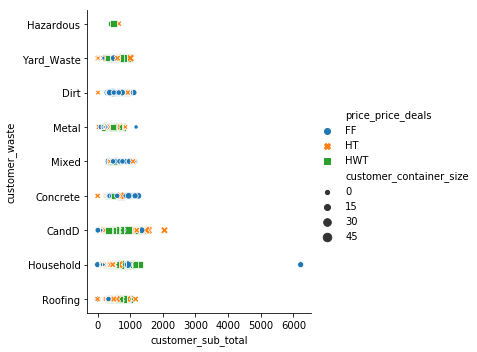

In [87]:
sns.relplot(y='customer_waste', x='customer_sub_total', 
            data=df, kind='scatter', size='customer_container_size', style='price_price_deals', hue='price_price_deals')